HW1: Multiclass SVM

-Example: Have a linear SVM kernel

In [120]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

In [121]:
# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2] # we only take the first two features. We could
 # avoid this ugly slicing by using a two-dim dataset
y = iris.target

In [122]:
# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0 # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=1, gamma='scale').fit(X, y)

In [123]:
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
 np.arange(y_min, y_max, h))

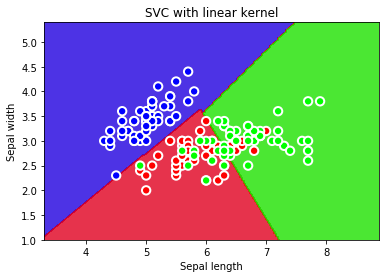

In [124]:
plt.subplot(1, 1, 1)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.brg, alpha=0.8)

plt.scatter(X[:, 0], X[:, 1], s=70, c=y, cmap=plt.cm.brg, edgecolor='white', lw=2)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with linear kernel')
plt.show()

SVM의 매개변수 tuning: C, gamma

In [1]:
from IPython.display import Image

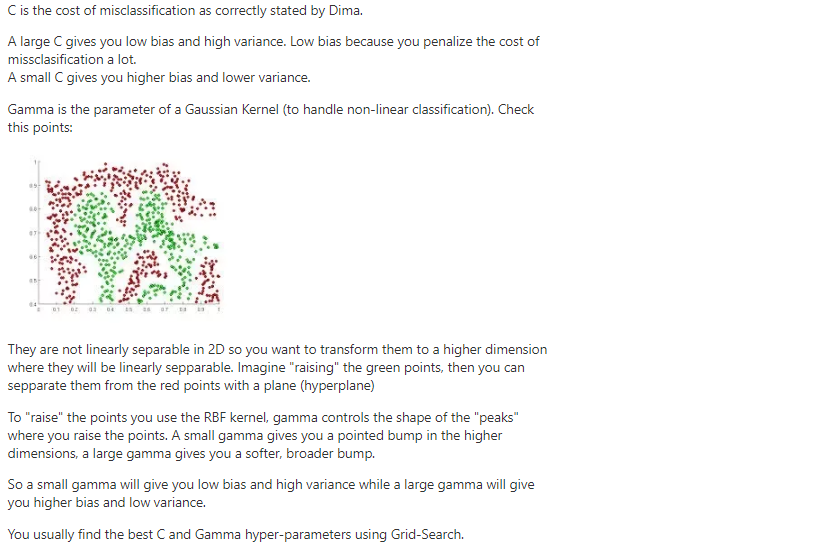

In [3]:
Image(filename="5.png")

In [5]:
Image(filename='7.png')

C는 regularization term의 계수 
- C가 크면, penalty를 크게, 엄격하게 -> 현 데이터에 overfitting -> low bias, high var
- C가 작으면, penalty를 작게, 덜 엄격하게 -> robust한 모델 -> high bias, low var                  

gamma는 rbf kernel 사용시, 솟아오른 데이터 모양의(?) peak를 조절
- gamma가 크면, peak를 더 낮게 -> error를 더 잘 허용 -> high bias, low var
- gamma가 작으면, peak를 더 높게 -> error를 완강하게 -> low bias, high var

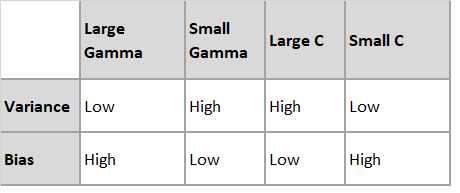

In [4]:
Image(filename="6.png")

In [125]:
import mglearn #랜덤한 데이터셋을 생성하거나 머신러닝 적용 결과를 보기좋게 표현하기 위한 함수들이 대부분

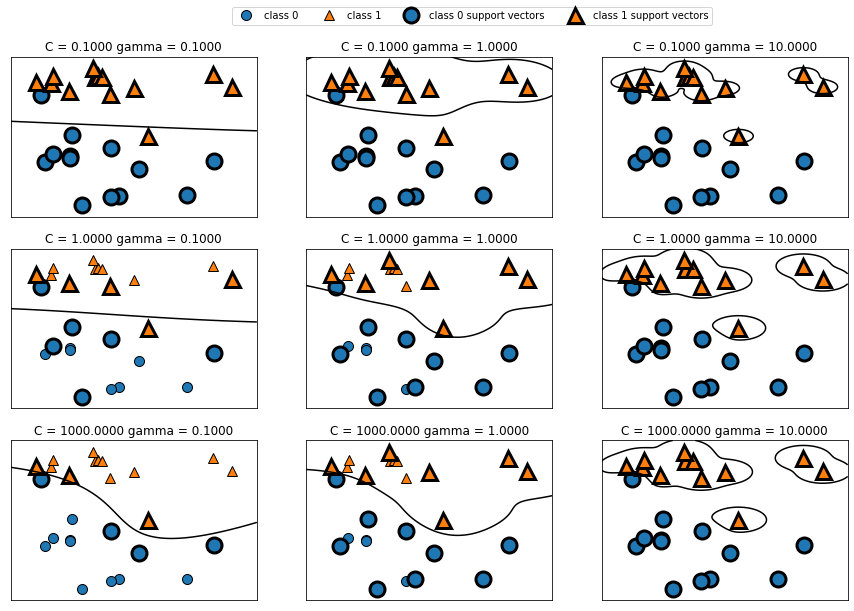

In [126]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)

axes[0, 0].legend(["class 0", "class 1", "class 0 support vectors", "class 1 support vectors"],
                  ncol=4, loc=(.9, 1.2))

-Example: Use SVM rbf kernel

In [160]:
svc = svm.SVC(kernel='rbf', C=1,gamma='scale').fit(X, y)
# gamma: Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’. Higher the value of gamma, 
# will try to exact fit the as per training data set i.e. generalization error and cause over-fitting problem.

In [161]:
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
 np.arange(y_min, y_max, h))

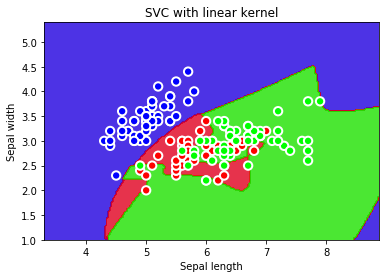

In [162]:
plt.subplot(1, 1, 1)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.brg, alpha=0.8)

plt.scatter(X[:, 0], X[:, 1], s=70, c=y, cmap=plt.cm.brg, edgecolor='white', lw=2)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with linear kernel')
plt.show()

C와 gamma에 따른 SVM

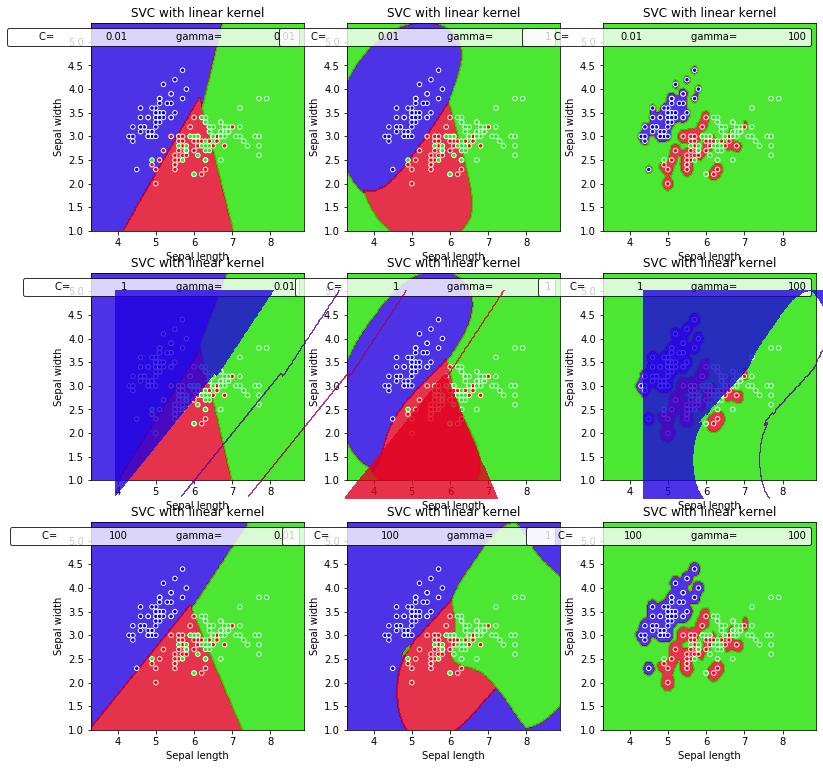

In [189]:
fig = plt.figure(figsize=(13,13))

k=1
while k < 10:
    for i in ([0.01, 1, 100]):
        for j in [0.01, 1, 100]:
            svc = svm.SVC(kernel='rbf', C=i, gamma=j).fit(X, y)
            Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            
            ax = fig.add_subplot(3, 3, k)
        
            plt.contourf(xx, yy, Z, cmap=plt.cm.brg, alpha=0.8)
            plt.scatter(X[:, 0], X[:, 1], s=20, c=y, cmap=plt.cm.brg, edgecolor='white', lw=1)
            plt.xlabel('Sepal length')
            plt.ylabel('Sepal width')
            plt.xlim(xx.min(), xx.max())
            plt.title('SVC with linear kernel')
            ax.legend(["C= ", i, "gamma= ", j], ncol=4, loc='best', edgecolor='black')
            
            k += 1
            
plt.show()